# AI-Powered Job Market Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [ ]:
# dataset=https://www.kaggle.com/datasets/uom190346a/ai-powered-job-market-insights

In [22]:
df=pd.read_csv("ai_job_market_insights.csv")
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


### Checking null values

In [24]:
df.isnull().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

### basic statistics

In [25]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [26]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

Text(0.5, 1.0, 'Salary Distribution')

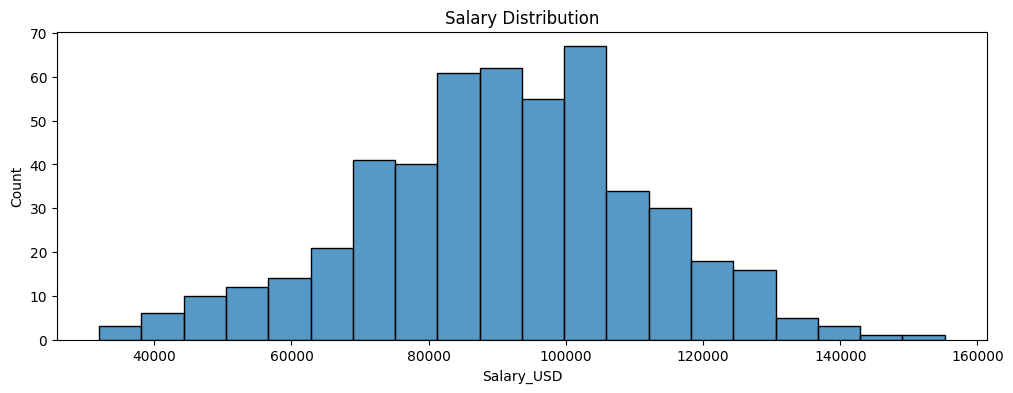

In [110]:
plt.figure(figsize=(12,4))
sns.histplot(df["Salary_USD"])
plt.title("Salary Distribution")

#### insight: Average salary in between 80000 to 10000 USD

C:\Users\DELL\AppData\Local\Temp\ipykernel_11544\552434973.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Industry', y='Salary_USD', hue='AI_Adoption_Level', marker='o', ci=None )


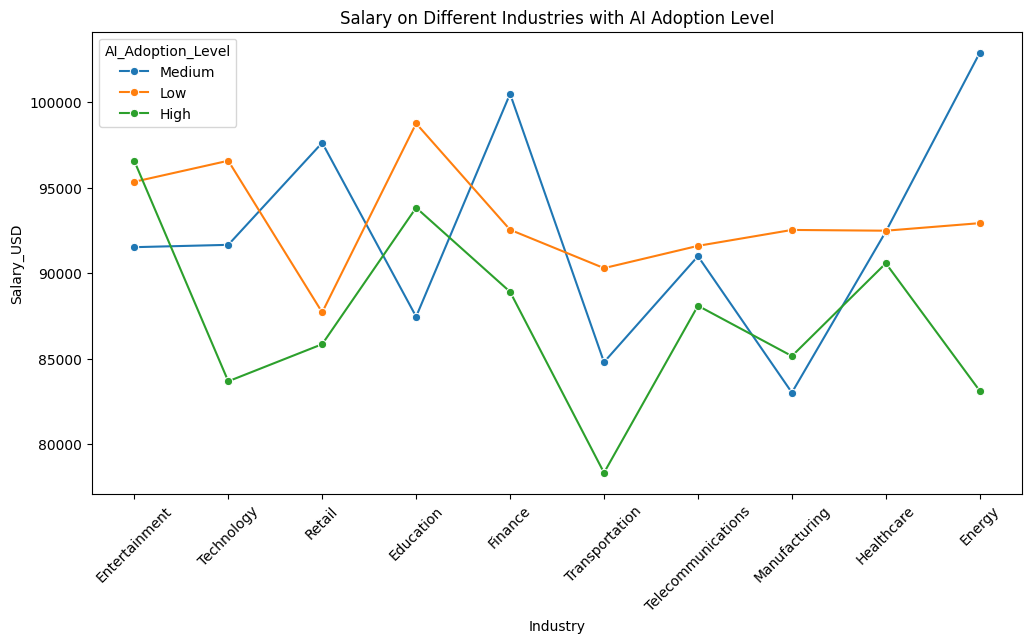

In [115]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Industry', y='Salary_USD', hue='AI_Adoption_Level', marker='o', ci=None )
plt.title('Salary on Different Industries with AI Adoption Level')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.show()

#### The highest salary is available in Finance and Energy sectors with a medium level of AI adoption.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11544\3472748765.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Location', y='Salary_USD', hue='Automation_Risk', marker='o', ci=None)


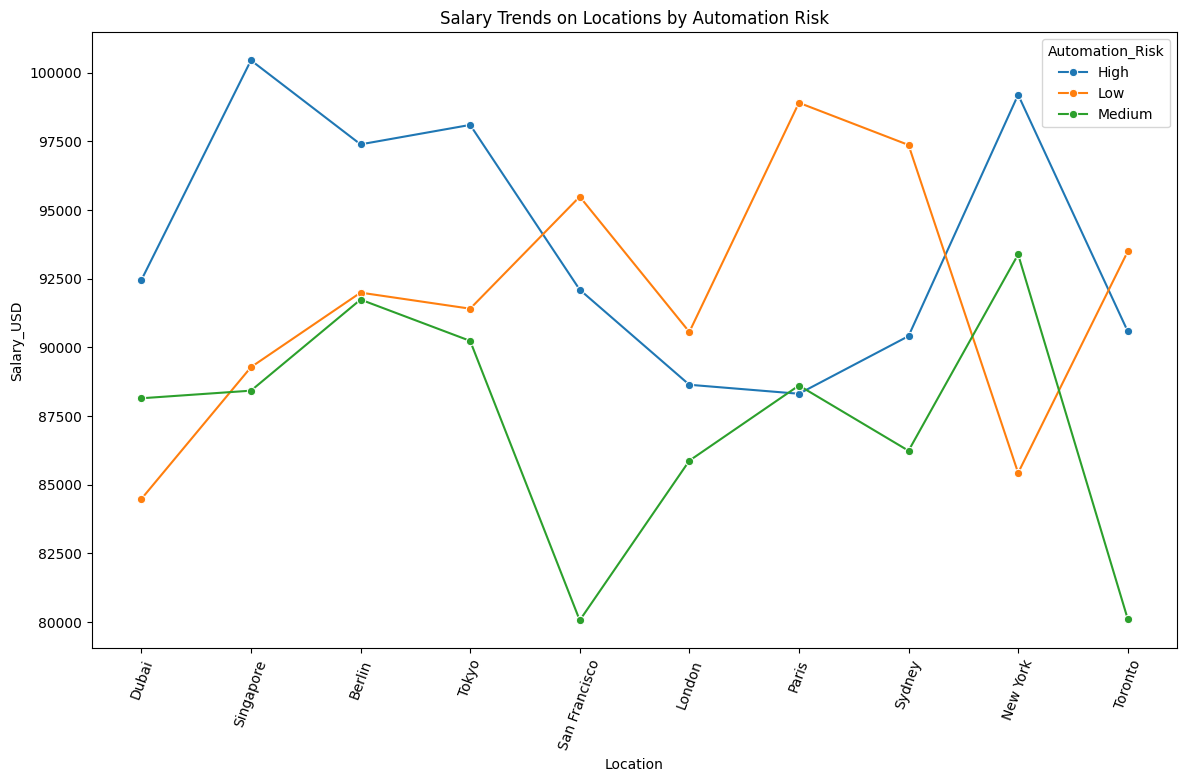

In [117]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Location', y='Salary_USD', hue='Automation_Risk', marker='o', ci=None)
plt.title('Salary Trends on Locations by Automation Risk')
plt.xlabel('Location')
plt.xticks(rotation=70)
plt.show()

#### When the Automated risk is high the Salary also be high

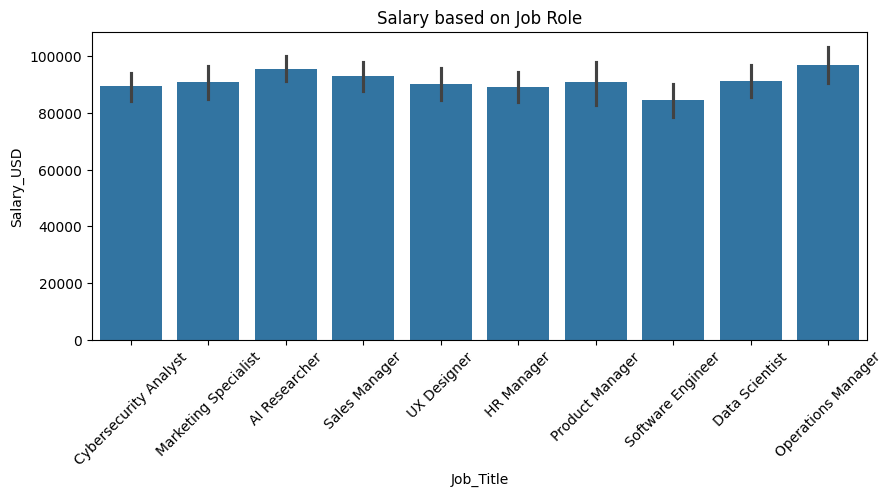

In [123]:
plt.figure(figsize=(10, 4))
barplot = sns.barplot(x=df["Job_Title"],y=df["Salary_USD"],data=df)
plt.title("Salary based on Job Role")
plt.xticks(rotation=45)
plt.show()

#### The average salary for different job titles shows no major differences.

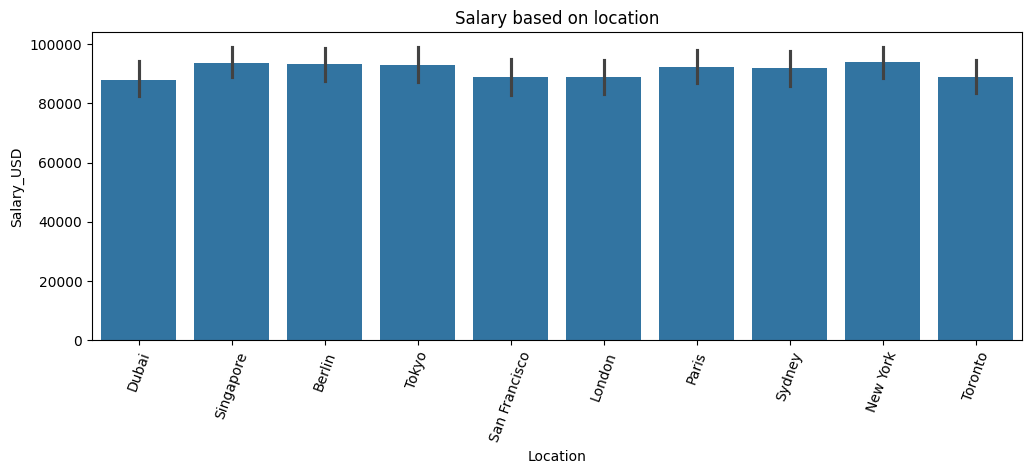

In [103]:
# Set figure size
plt.figure(figsize=(12, 4))

# Create the Seaborn barplot
barplot = sns.barplot(x=df["Location"],y=df["Salary_USD"],data=df)

# Add title and rotate x-axis labels
plt.title("Salary based on location")
plt.xticks(rotation=70)


# Show the plot
plt.show()


#### The average salary for different Location shows no major differences.

In [34]:
df.head(2)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline


In [63]:
avg_salery=df.groupby(["Required_Skills"])["Salary_USD"].mean().sort_values(ascending=False)
avg_salery

Required_Skills
JavaScript            98943.904468
Python                94839.038617
Sales                 93101.254399
Machine Learning      90838.709521
Project Management    90738.999035
UX/UI Design          89782.305202
Cybersecurity         89361.480313
Communication         88770.416054
Marketing             88127.974986
Data Analysis         87166.433416
Name: Salary_USD, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'JavaScript'),
  Text(1, 0, 'Python'),
  Text(2, 0, 'Sales'),
  Text(3, 0, 'Machine Learning'),
  Text(4, 0, 'Project Management'),
  Text(5, 0, 'UX/UI Design'),
  Text(6, 0, 'Cybersecurity'),
  Text(7, 0, 'Communication'),
  Text(8, 0, 'Marketing'),
  Text(9, 0, 'Data Analysis')])

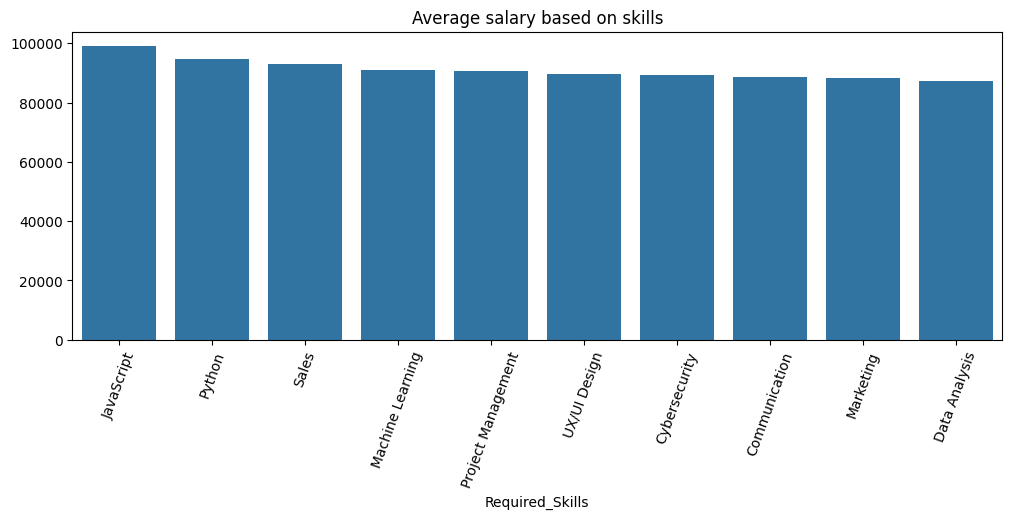

In [102]:
plt.figure(figsize=(12,4))
sns.barplot(x=avg_salery.index,y=avg_salery.values)
plt.title("Average salary based on skills")
plt.xticks(rotation=70)

#### JavaScript has the highest salary skill

In [124]:
avg_salery_indusry=df.groupby(["Industry"])["Salary_USD"].mean().sort_values(ascending=False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Finance'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Energy'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Retail'),
  Text(6, 0, 'Technology'),
  Text(7, 0, 'Telecommunications'),
  Text(8, 0, 'Manufacturing'),
  Text(9, 0, 'Transportation')])

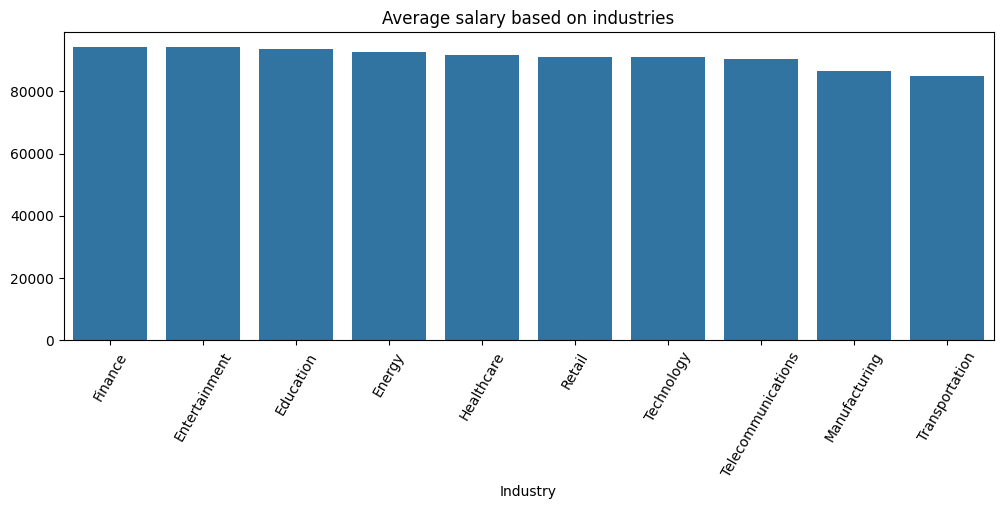

In [101]:
plt.figure(figsize=(12,4))
sns.barplot(x=avg_salery_indusry.index,y=avg_salery_indusry.values)
plt.title("Average salary based on industries")
plt.xticks(rotation=60)

In [78]:
Avg_salery=df.groupby(["Industry","Required_Skills"])["Salary_USD"].mean().reset_index()

<Axes: xlabel='Salary_USD', ylabel='Required_Skills'>

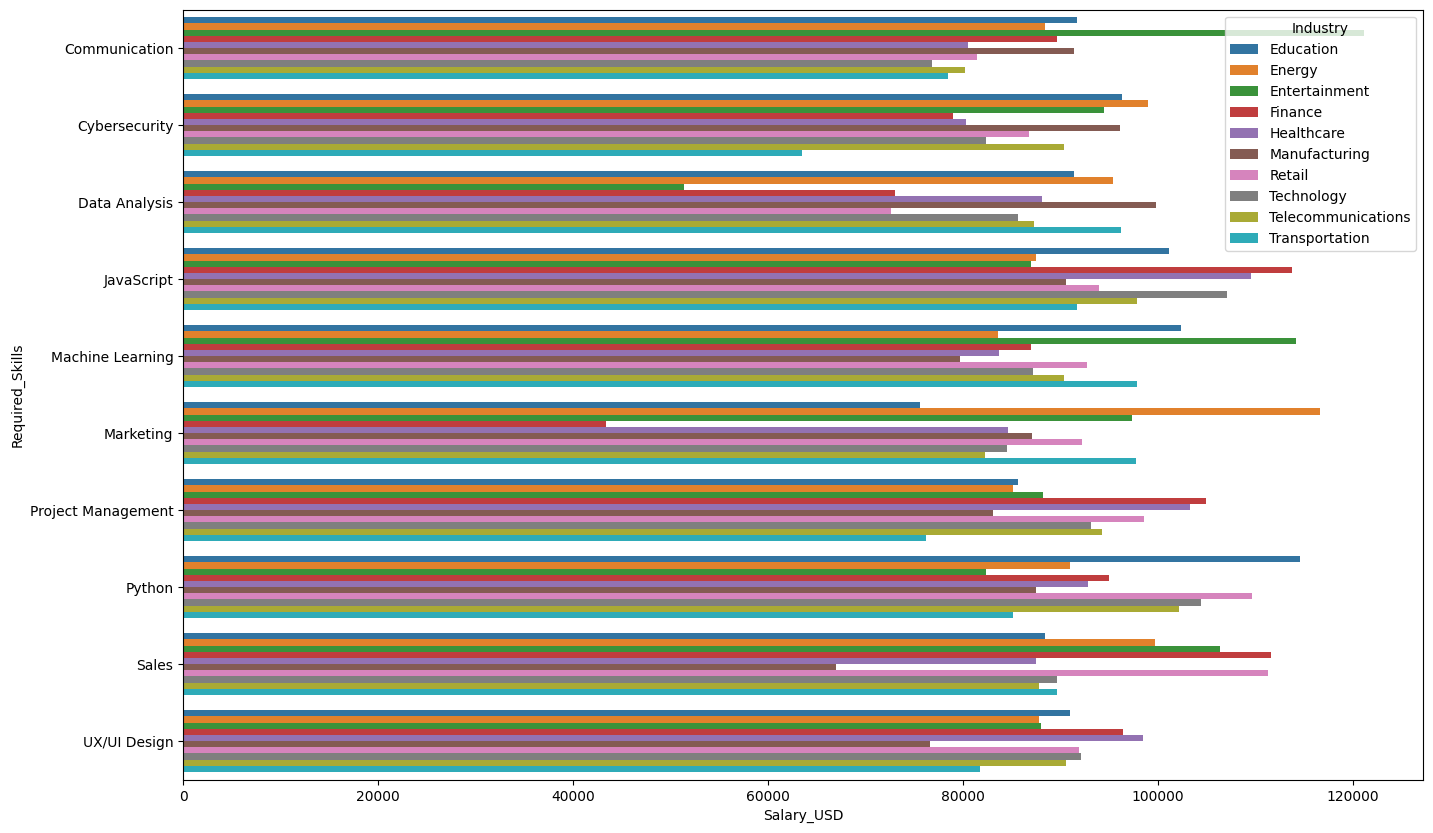

In [85]:
plt.figure(figsize=(16,10))
sns.barplot(hue=Avg_salery["Industry"],x=Avg_salery["Salary_USD"],data=Avg_salery,y=Avg_salery["Required_Skills"])

In [89]:
Avg_salery_ai=df.groupby(["Industry",'AI_Adoption_Level'])["Salary_USD"].mean().reset_index()

<Axes: xlabel='Salary_USD', ylabel='Industry'>

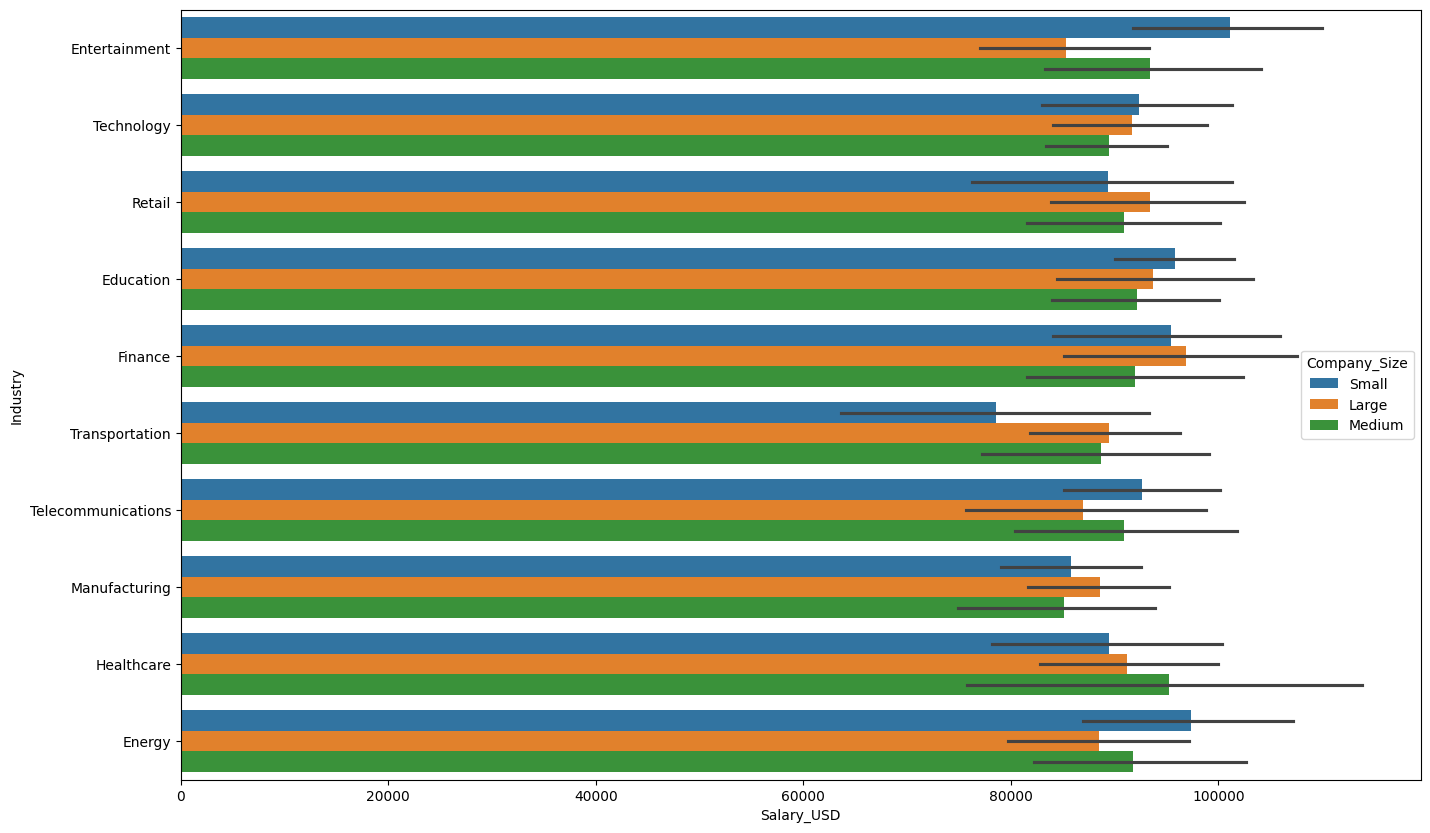

In [95]:
plt.figure(figsize=(16,10))
sns.barplot(y=df["Industry"],x=df["Salary_USD"],data=df,hue=df["Company_Size"])

#### Even small companies are offering higher salaries across different industries.

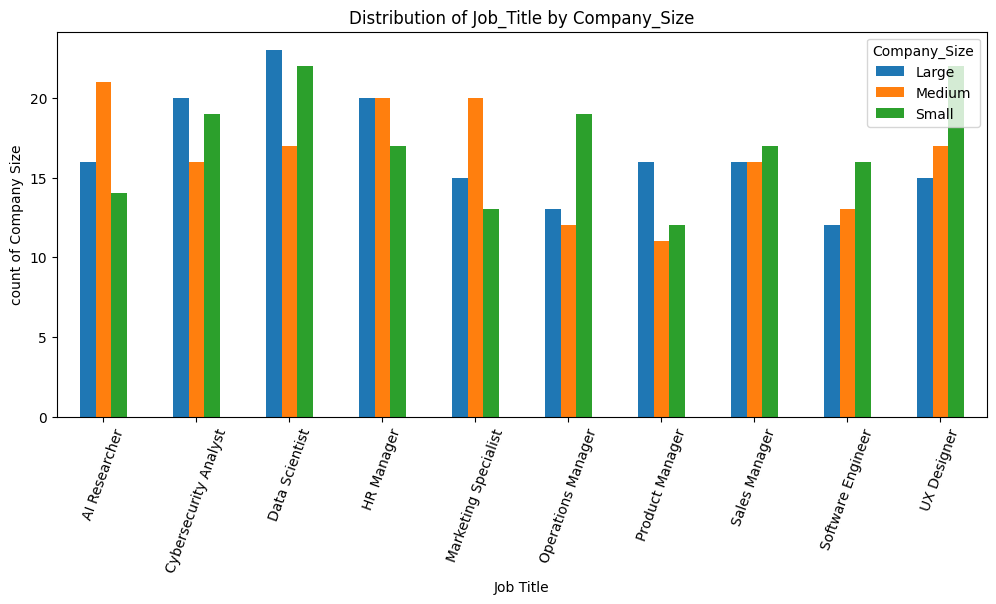

In [122]:
subject_counts = df.groupby(["Job_Title", "Company_Size"]).size().unstack()
subject_counts.plot(kind='bar', figsize=(12, 5))
plt.title('Distribution of Job_Title by Company_Size')
plt.xlabel('Job Title')
plt.ylabel('count of Company Size')
plt.xticks(rotation=70)
plt.show()

#### In small size company hiring more peoples for the role of Operational Manager,Sales Manager,Software Engineer and UX Designer

<Axes: xlabel='AI_Adoption_Level', ylabel='count'>

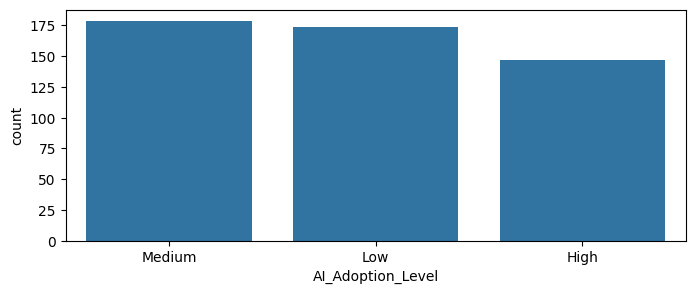

In [154]:
plt.figure(figsize=(8,3))
sns.countplot(x=df["AI_Adoption_Level"],data=df)

#### Medium level of AI adoption has the highest count

Text(0.5, 1.0, 'Salary over Automation_Rist')

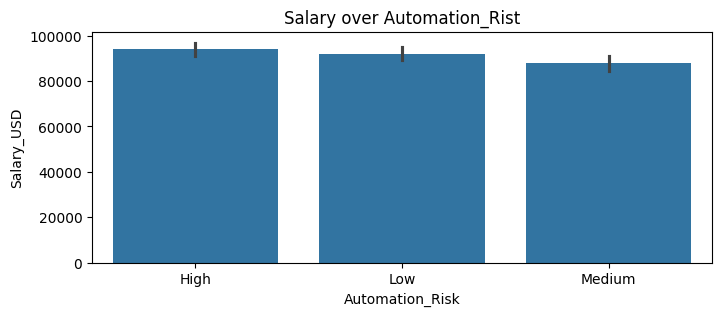

In [155]:
plt.figure(figsize=(8,3))
sns.barplot(x=df["Automation_Risk"],y=df["Salary_USD"],data=df)
plt.title("Salary over Automation_Rist")

#### Even the Automation Risk is low the Salary is high

In [156]:
df.head(2)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline


([<matplotlib.patches.Wedge at 0x1adf994eb70>,
 [Text(1.022754137889241, 0.404936999335002, 'Project Management'),
  Text(0.4683572458822386, 0.9953097458729139, 'Python'),
  Text(-0.32674569331780584, 1.0503510136607983, 'Cybersecurity'),
  Text(-0.9212808152346587, 0.601033825571043, 'Machine Learning'),
  Text(-1.0982417081816183, -0.062170333844376924, 'UX/UI Design'),
  Text(-0.8606299364043563, -0.6850665022934882, 'Sales'),
  Text(-0.3068903026862397, -1.056323029246806, 'Data Analysis'),
  Text(0.33333871454532377, -1.0482773017600215, 'Marketing'),
  Text(0.8386867133321643, -0.7117616152056055, 'JavaScript'),
  Text(1.074994922300288, -0.233207883718793, 'Communication')],
 [Text(0.5578658933941315, 0.22087472691000107, '12.00%'),
  Text(0.2554675886630392, 0.5428962250215893, '12.00%'),
  Text(-0.17822492362789408, 0.5729187347240717, '11.60%'),
  Text(-0.5025168083098138, 0.3278366321296598, '10.40%'),
  Text(-0.599040931735428, -0.033911091187841955, '9.80%'),
  Text(-0.46

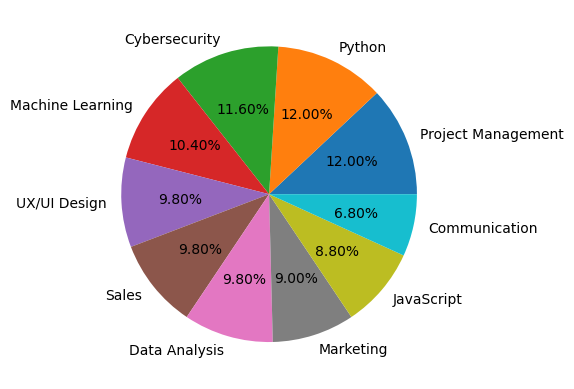

In [134]:
fig, ax = plt.subplots()
ax.pie(df["Required_Skills"].value_counts().values, labels=df["Required_Skills"].value_counts().index, autopct='%1.2f%%')

#### Python and Project Management are the major skills in 2024

([<matplotlib.patches.Wedge at 0x1adf9d68410>,
 [Text(0.5238620008512992, 0.9672479537657723, 'Small'),
  Text(-1.0986106518112515, -0.055268759049369474, 'Large'),
  Text(0.5717990621018798, -0.9397051838632214, 'Medium')],
 [Text(0.28574290955525405, 0.5275897929631485, '34.20%'),
  Text(-0.599242173715228, -0.03014659584511062, '33.20%'),
  Text(0.3118903975101162, -0.5125664639253934, '32.60%')])

<Figure size 600x600 with 0 Axes>

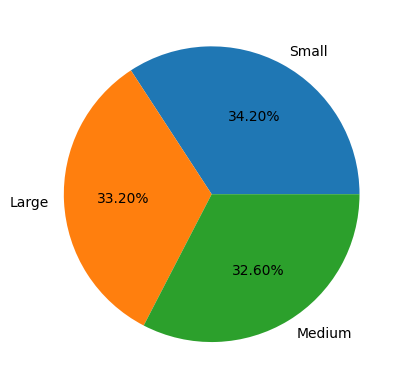

In [137]:
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(df["Company_Size"].value_counts().values, labels=df["Company_Size"].value_counts().index, autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x1ad81430920>,
 [Text(1.0277618408134188, 0.39205305580726285, 'Manufacturing'),
  Text(0.5116662061248267, 0.9737544318306472, 'Education'),
  Text(-0.2466978266062584, 1.071979562467377, 'Technology'),
  Text(-0.8691705117195708, 0.6741977614596029, 'Finance'),
  Text(-1.09997828701552, -0.006911446621550899, 'Telecommunications'),
  Text(-0.8775738985195078, -0.663222475974143, 'Energy'),
  Text(-0.346485214238472, -1.04400574534536, 'Entertainment'),
  Text(0.2869256034287159, -1.0619198171693884, 'Retail'),
  Text(0.8018654499779143, -0.7530018593149138, 'Healthcare'),
  Text(1.0671392422973378, -0.2668592092266326, 'Transportation')],
 [Text(0.5605973677164102, 0.21384712134941608, '11.60%'),
  Text(0.2790906578862691, 0.5311387809985348, '11.40%'),
  Text(-0.13456245087614094, 0.5847161249822055, '11.20%'),
  Text(-0.47409300639249313, 0.3677442335234197, '10.60%'),
  Text(-0.5999881565539199, -0.003769879975391399, '10.60%'),
  Text(-0.4786766719

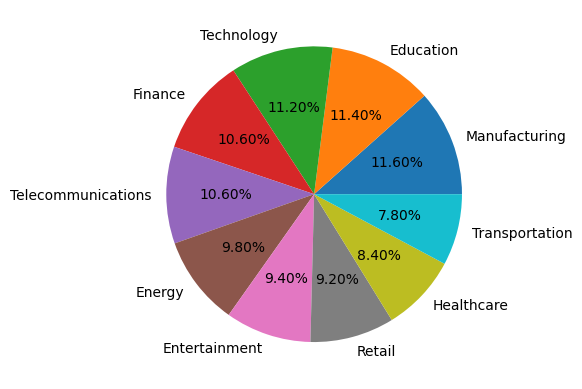

In [150]:
fig, ax = plt.subplots()
ax.pie(df["Industry"].value_counts().values, labels=df["Industry"].value_counts().index, autopct='%1.2f%%')

In [145]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


<Axes: xlabel='count', ylabel='Job_Title'>

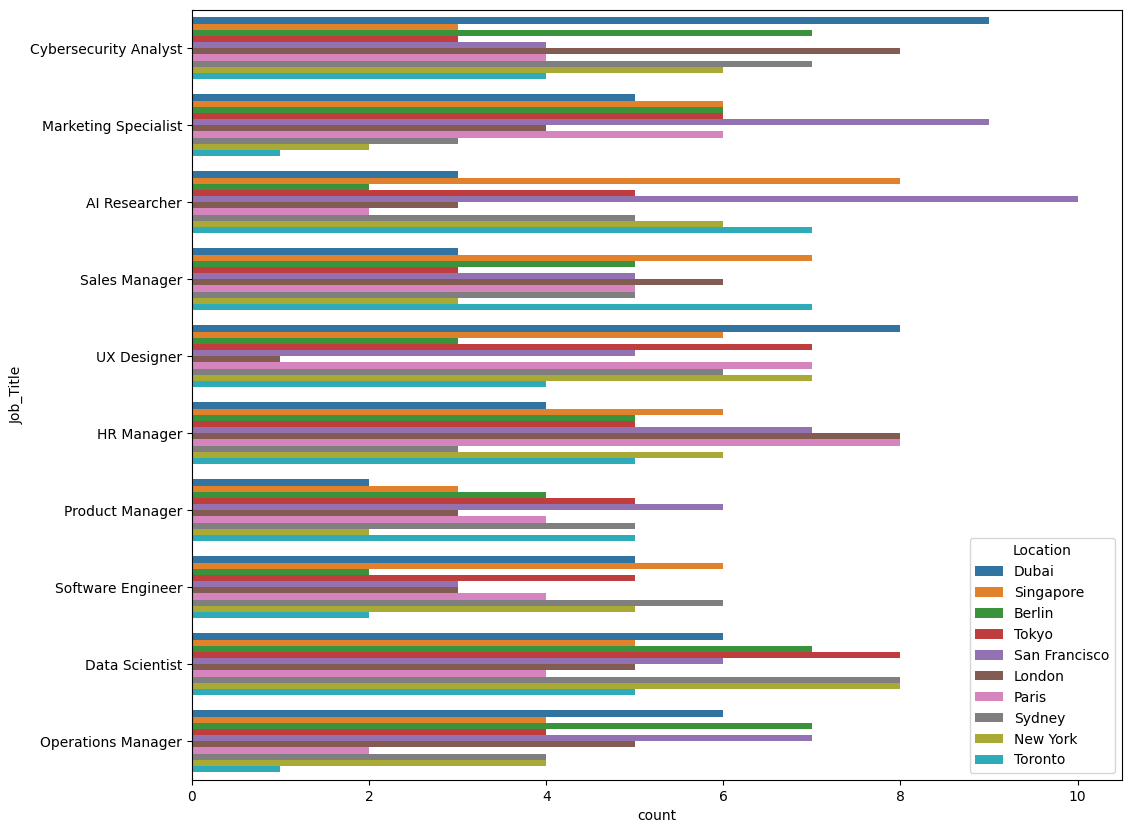

In [147]:
plt.figure(figsize=(12,10))
sns.countplot(y=df["Job_Title"],data=df,hue=df["Location"])